<a href="https://colab.research.google.com/github/Kush-Singh-26/Image-Classification-CIFAR_10/blob/main/Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as tranformers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tranform = tranformers.Compose([
    tranformers.ToTensor(),
    tranformers.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=tranform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=tranform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=True)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



100%|██████████| 170M/170M [00:04<00:00, 40.5MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [5]:
class CNNmodel(nn.Module):
  def __init__(self):
    super(CNNmodel, self).__init__()
    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding = 1)
    self.pool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(64*8*8, 125)
    self.fc2 = nn.Linear(125,10)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.pool(self.relu(self.conv1(x)))
    x = self.pool(self.relu(self.conv2(x)))
    x = x.view(-1, 64*8*8)
    x = self.relu(self.fc1(x))
    x = self.fc2(x)

    return x

In [6]:
model = CNNmodel().to("cuda")

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

epochs = 5

for epoch in range(epochs):
  running_loss = 0.0

  for images, labels in trainloader:
    images, labels = images.to("cuda"), labels.to("cuda")

    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}")


Epoch 1, Loss: 1.2980990048714807
Epoch 2, Loss: 0.9212225907823632
Epoch 3, Loss: 0.7686447437306817
Epoch 4, Loss: 0.6538676934332247
Epoch 5, Loss: 0.5604200181637676


In [8]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to("cuda"), labels.to("cuda")
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total:.2f}%')


Accuracy: 71.38%


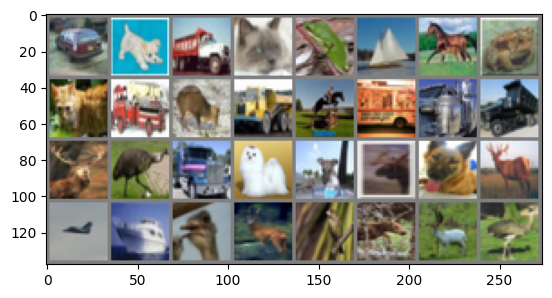

Predicted: ['car', 'cat', 'truck', 'cat', 'bird', 'ship', 'horse', 'frog', 'deer', 'truck', 'horse', 'truck', 'plane', 'truck', 'truck', 'truck', 'deer', 'bird', 'truck', 'cat', 'dog', 'cat', 'cat', 'horse', 'plane', 'ship', 'bird', 'deer', 'bird', 'horse', 'bird', 'bird']


In [9]:
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random test images
dataiter = iter(testloader)
images, labels = next(dataiter)

# Display images
imshow(torchvision.utils.make_grid(images))

# Predict labels
images = images.to("cuda")
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Print predictions
print('Predicted:', [classes[p] for p in predicted])
